# 演示过拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed = 666
x = np.random.uniform(-3, 3, size= 100)
X = x.reshape(-1, 1)
y = 0.5 * x **2 + x + 2 + np.random.normal(0,1, size=100)

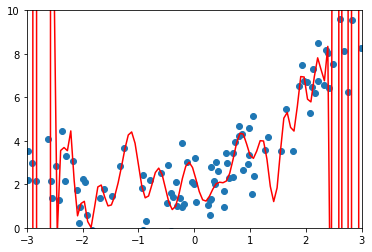

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def PolyReg(degree):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    return poly_reg
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
poly100_reg = PolyReg(100)
poly100_reg.fit(X, y)
y_plot = poly100_reg.predict(X_plot)
plt.scatter(X, y)
plt.axis([-3, 3, 0, 10])
plt.plot(X_plot[:, 0], y_plot, color="r")
plt.show()

# train test split 的意义

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
X_train.shape

(75, 1)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_predict, y_test)

2.7610806046930607

In [10]:
poly2_reg = PolyReg(2)
poly2_reg.fit(X_train, y_train)
y_predict = poly2_reg.predict(X_test)
mean_squared_error(y_predict, y_test)

1.6352358241875828

In [11]:
poly100_reg = PolyReg(100)
poly100_reg.fit(X_train, y_train)
y_predict = poly100_reg.predict(X_test)
mean_squared_error(y_predict, y_test)

3.250961055560689e+17

# 可以看到对新的数据而言 误差已经非常大了
# 理解欠拟合和过拟合 - 1模型复杂度
![modelcom](img/modelcom.png)

# 理解 - 1学习曲线

In [12]:
X_train.shape

(75, 1)

In [13]:
# 绘制学习曲线  
# 每次多一点训练数据 来查看模型的表现

In [14]:
from sklearn.linear_model import LinearRegression
train_score = []
test_score = []

for i in range(1, X_train.shape[0]):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(X_train[:i])
    y_test_predict = lin_reg.predict(X_test)
    train_score.append(mean_squared_error(y_train_predict, y_train[:i]))
    test_score.append(mean_squared_error(y_test_predict, y_test))

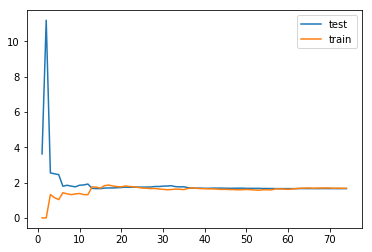

In [20]:
plt.plot([i for i in range(1, X_train.shape[0])], np.sqrt(test_score), label="test")
plt.plot([i for i in range(1, X_train.shape[0])], np.sqrt(train_score), label="train")

plt.legend()
plt.show()
# 线性回归时

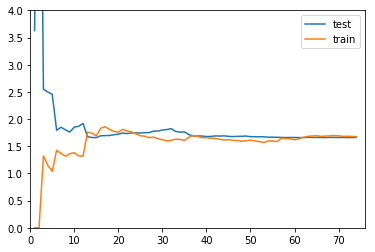

In [16]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []

    for i in range(1, X_train.shape[0]):
        lin_reg = algo
        lin_reg.fit(X_train[:i], y_train[:i])
        y_train_predict = lin_reg.predict(X_train[:i])
        y_test_predict = lin_reg.predict(X_test)
        train_score.append(mean_squared_error(y_train_predict, y_train[:i]))
        test_score.append(mean_squared_error(y_test_predict, y_test))
    plt.plot([i for i in range(1, X_train.shape[0])], np.sqrt(test_score), label="test")
    plt.plot([i for i in range(1, X_train.shape[0])], np.sqrt(train_score), label="train")

    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

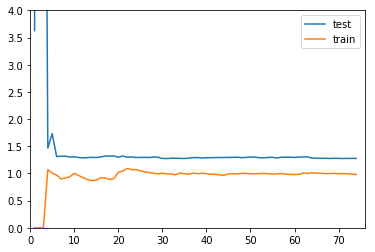

In [17]:
# 使用2多项式回归时的曲线
# 最佳曲线
poly2_reg = PolyReg(2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

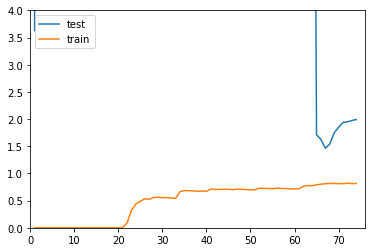

In [18]:
# 使用20多项式回归时的曲线
poly20_reg = PolyReg(20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

In [ ]:
# 如果在数据较多 稳定后, 测试数据集和训练数据集里面的还有很大的距离 那么 就是有过拟合
# 如果 稳定后 训练数据集合测试数据集相差不大 但是整体误差比较大, 那就是欠拟合